 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.sort_index(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_returns = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns.sort_index(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_returns.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [12]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns["Close"].str.replace("$", "").astype("float")

<ipython-input-12-bf9d515e3995>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_returns["Close"] = sp500_returns["Close"].str.replace("$", "").astype("float")


In [13]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns.pct_change()


In [14]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ["S&P 500 Daily Returns"]
sp500_daily_returns.head()

,S&P 500 Daily Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis='columns', join='inner')
combined_returns.isnull().sum()
combined_returns.dropna(inplace=True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

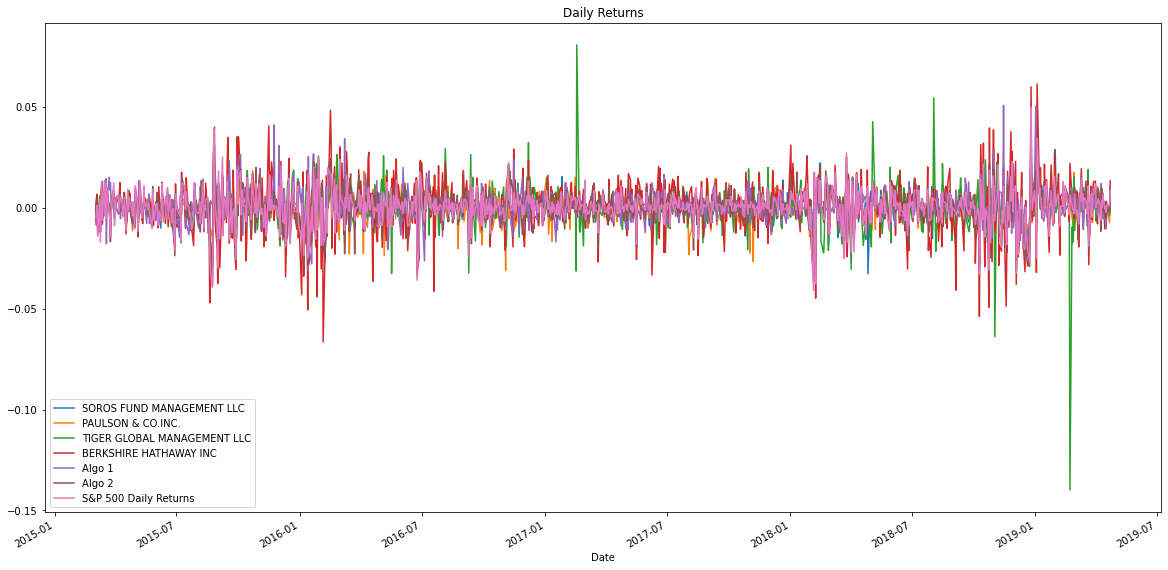

In [17]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,10), title="Daily Returns")


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

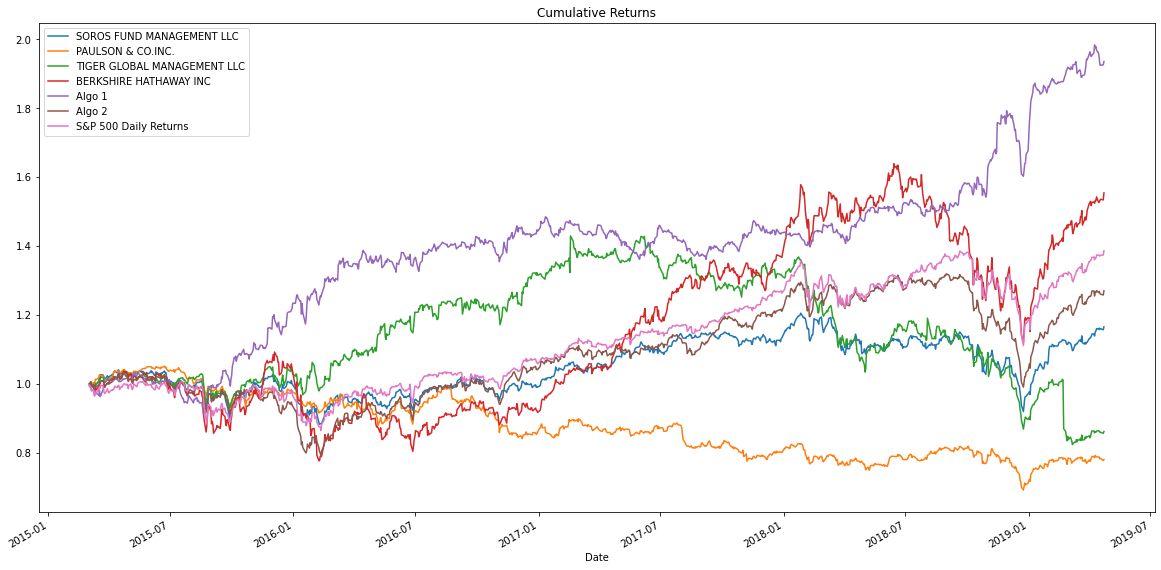

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk of Each Portfolio'}>

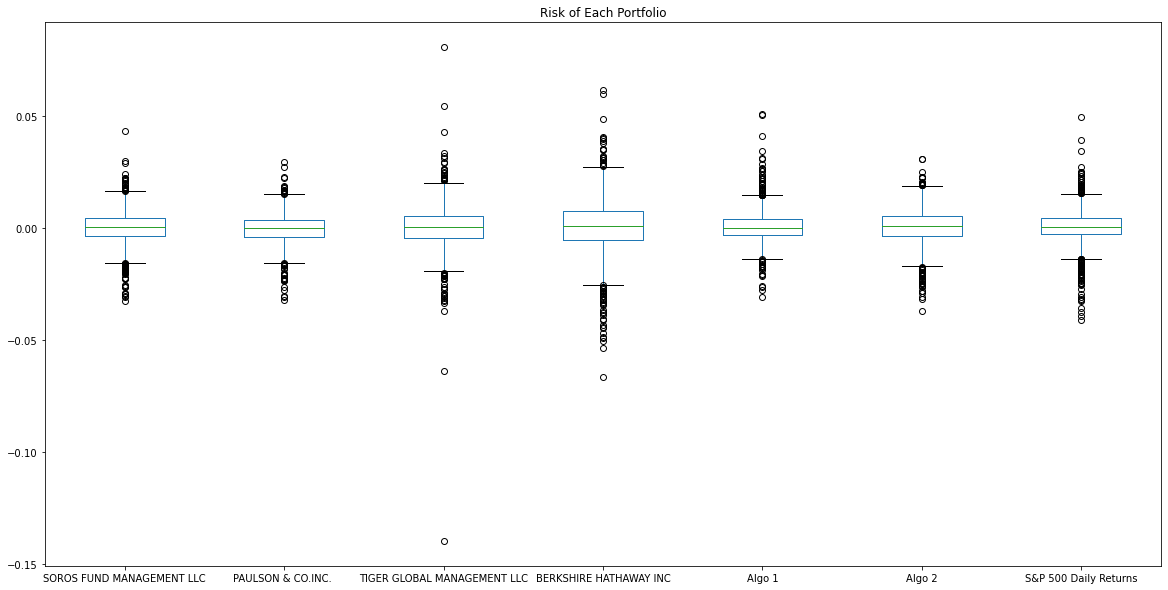

In [19]:
# Box plot to visually show risk
combined_returns.plot(kind = "box", figsize = (20,10), title="Risk of Each Portfolio")

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
combined_std = pd.DataFrame(combined_returns.std()).rename(columns = {0:"Standard Deviation"})
combined_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500 Daily Returns,0.008554


### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_returns_std = pd.DataFrame(sp500_daily_returns.std()).rename(columns = {0:"Standard Deviation"})

# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = combined_std[combined_std["Standard Deviation"] > combined_std.loc["S&P 500 Daily Returns", "Standard Deviation"] ]
riskier_than_sp500

,Standard Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500 Daily Returns,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviations 21-Day Window'}, xlabel='Date'>

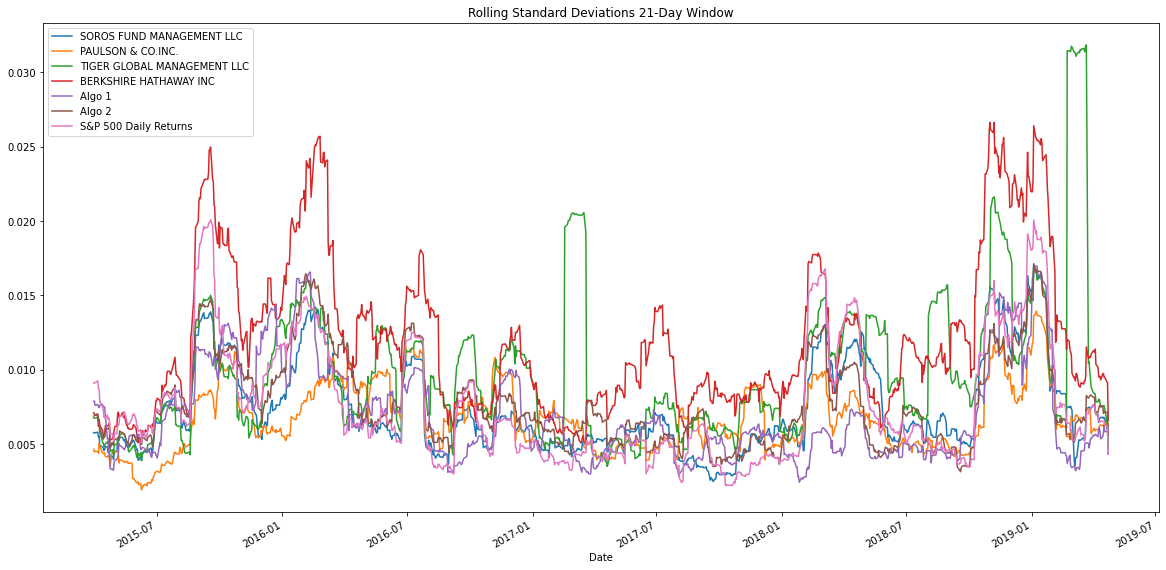

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_std = combined_returns.rolling(window=21).std()
sp500_rolling_std.plot(figsize = (20,10), title="Rolling Standard Deviations 21-Day Window")
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500 Daily Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [36]:
# Calculate covariance of a single portfolio
bh_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].cov(combined_returns['S&P 500 Daily Returns'])

# Calculate variance of S&P 500
sp500_variance = combined_returns['S&P 500 Daily Returns'].var()

# Computing beta
beta = bh_covariance / sp500_variance

# Plot beta trend
beta

1.1347891297491697

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling Window EWA'}, xlabel='Date'>

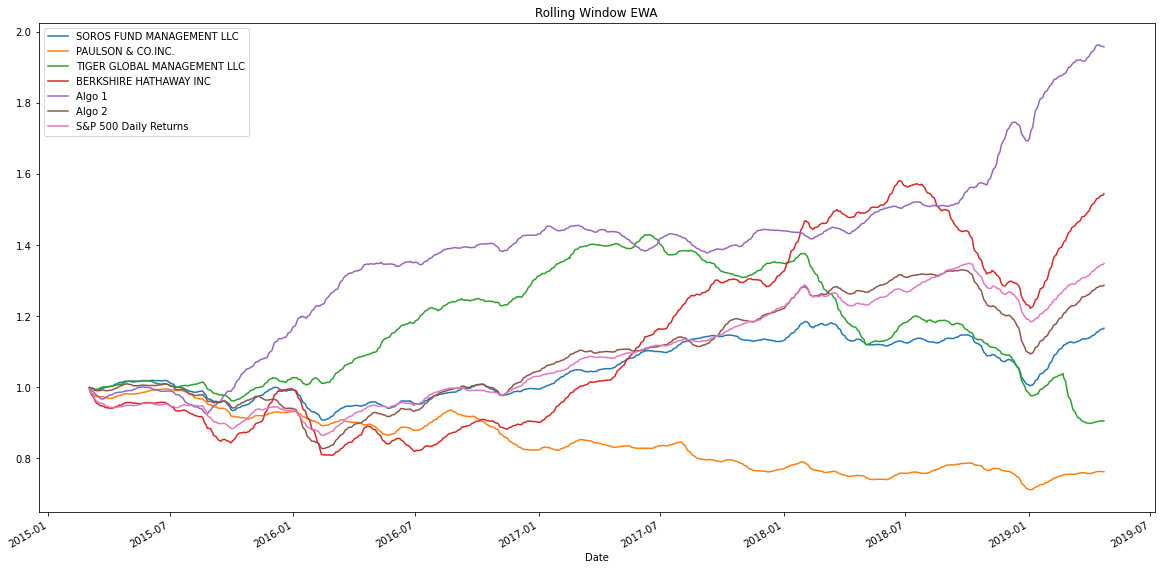

In [42]:
# Use `ewm` to calculate the rolling window

df_daily_ewm = combined_returns.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10), title= "Rolling Window EWA")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Annualized Sharpe Ratios
annualized_sharpe_ratio = combined_returns.mean()*252 / (combined_returns.std()*np.sqrt(252))
annualized_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500 Daily Returns          0.648267
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratio'}>

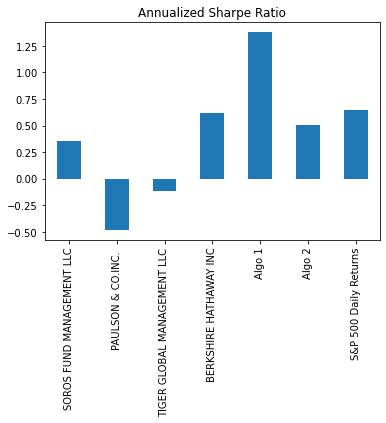

In [45]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot(kind = "bar", title = "Annualized Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithmic strategies (Algo 1) outpreformed both the market and the whales portfolios. While (Algo 2) underpreformed the market, (Algo 2) out preformed all of the whales portfolios except for Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [74]:
# Reading data from 1st stock
aapl_returns_csv = Path("aapl_historical.csv")
aapl_returns = pd.read_csv(aapl_returns_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_returns.sort_index(inplace=True)
aapl_returns = aapl_returns.drop('Symbol', axis=1)
aapl_returns.columns = ["AAPL"]
aapl_returns.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [75]:
# Reading data from 2nd stock
goog_returns_csv = Path("goog_historical.csv")
goog_returns = pd.read_csv(goog_returns_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_returns.sort_index(inplace=True)
goog_returns = goog_returns.drop('Symbol', axis=1)
goog_returns.columns = ["GOOG"]
goog_returns.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [77]:
# Reading data from 3rd stock
cost_returns_csv = Path("cost_historical.csv")
cost_returns = pd.read_csv(cost_returns_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_returns.sort_index(inplace=True)
cost_returns = cost_returns.drop('Symbol', axis=1)
cost_returns.columns = ["COST"]
cost_returns.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [82]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([aapl_returns, goog_returns, cost_returns], axis= 1, join='inner')


In [79]:
# Reset Date index
custom_portfolio.sort_index(ascending=True, inplace=True)


In [65]:
# Reorganize portfolio data by having a column per symbol


In [84]:
# Calculate daily returns

# Drop NAs
custom_portfolio.dropna(inplace=True)

# Display sample data
custom_portfolio.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [87]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_portfolio.pct_change().dot(weights)
custom_portfolio_returns.dropna(inplace=True)

# Display sample data
custom_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [93]:
# Join your returns DataFrame to the original returns DataFrame
total_portfolio_returns = pd.concat([custom_portfolio_returns, combined_returns], axis='columns', join='inner')
total_portfolio_returns.rename(columns = {0:"Custom Portfolio"}, inplace = True)


In [94]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfolio_returns.dropna(inplace=True)
total_portfolio_returns.tail()

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.011959,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [95]:
# Calculate the annualized `std`
total_portfolio_std = pd.DataFrame(total_portfolio_returns.std()).rename(columns = {0:"Standard Deviation"})
total_portfolio_std = total_portfolio_std.sort_values(by='Standard Deviation', ascending=False)
total_portfolio_std

,Standard Deviation
BERKSHIRE HATHAWAY INC,0.015569
TIGER GLOBAL MANAGEMENT LLC,0.014648
Custom Portfolio,0.013323
S&P 500 Daily Returns,0.009578
SOROS FUND MANAGEMENT LLC,0.009240
Algo 2,0.008791
Algo 1,0.008423
PAULSON & CO.INC.,0.007353


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviations 21-Day Window'}>

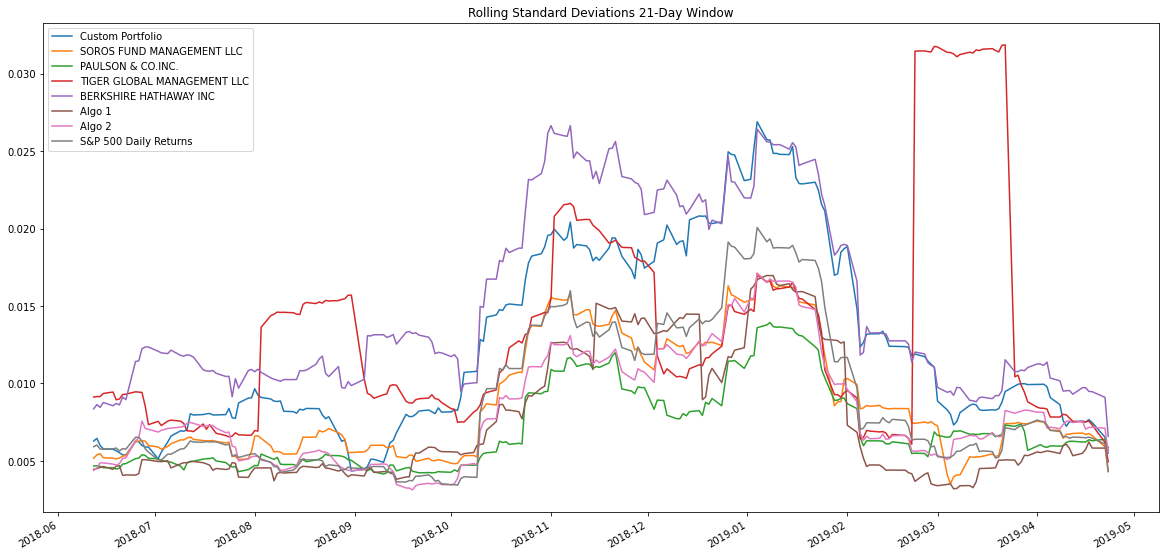

In [100]:
# Calculate rolling standard deviation
total_rolling_std = total_portfolio_returns.rolling(window=21).std()


# Plot rolling standard deviation
total_rolling_std.plot(figsize = (20,10), title="Rolling Standard Deviations 21-Day Window")

### Calculate and plot the correlation

In [101]:
# Calculate and plot the correlation
correlation = total_portfolio_returns.corr()
correlation

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Custom Portfolio,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 500 Daily Returns,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio'}>

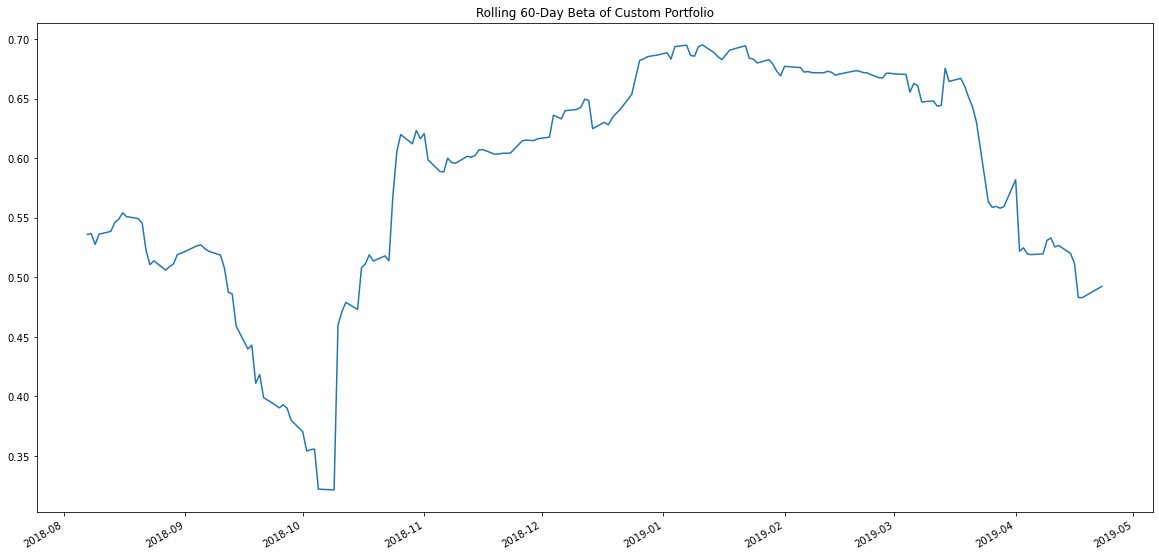

In [106]:
# Calculate and plot Beta
rolling_covariance = total_portfolio_returns['Custom Portfolio'].rolling(window=60).cov(total_portfolio_returns['S&P 500 Daily Returns'])
rolling_variance = total_portfolio_returns['Custom Portfolio'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Custom Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [102]:
# Calculate Annualzied Sharpe Ratios
annualized_sharpe_ratios = total_portfolio_returns.mean() * 252 / (total_portfolio_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Annualized Sharpe Ratio'}>

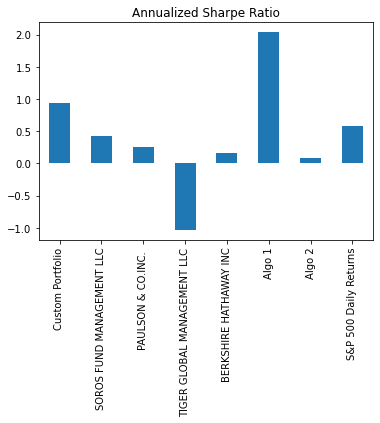

In [103]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind = "bar", title = "Annualized Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

In [107]:
##My custom portfolio outpreforms the market along with all the whales portfolios.The only portfolio my custom portfolio underpreforms is the Algo 1. 